# WORd2Vec

**Word2Vec is a popular natural language processing (NLP) technique used to represent words as numerical vectors in a continuous vector space. It's a type of word embedding method that captures the semantic meaning of words based on their context within a large corpus of text. Word2Vec was introduced by researchers at Google in 2013 and has since become a fundamental tool in NLP applications.**

**The primary idea behind Word2Vec is that words with similar meanings tend to appear in similar contexts. Word2Vec algorithms learn to map words to dense vectors in such a way that words that share similar contexts are closer together in the vector space. There are two main techniques used in Word2Vec: Continuous Bag of Words (CBOW) and Skip-gram.**

1. Continuous Bag of Words (CBOW): CBOW aims to predict a target word based on its surrounding context words. The model takes a window of context words and tries to predict the target word. For example, given the sentence "The cat is sitting on the mat," the CBOW model might be trained to predict the word "sitting" based on the context words "The," "cat," "is," "on," and "the."

2. Skip-gram: Skip-gram is the reverse of CBOW. It aims to predict the context words based on a target word. It takes a target word and tries to predict the words that might appear around it. Using the same example sentence, the Skip-gram model might be trained to predict "The," "cat," "is," "on," and "the" based on the word "sitting."

**Both CBOW and Skip-gram models are trained on large text corpora using a neural network architecture. The resulting word vectors, often referred to as "word embeddings," capture semantic relationships between words. Words that are semantically similar are represented as vectors that are closer together in the vector space. These word embeddings can then be used in various NLP tasks, such as sentiment analysis, machine translation, text classification, and more.**

**Word2Vec embeddings have proven to be highly effective in capturing word meanings and semantic relationships, making them an essential component of many modern NLP applications and research.**

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install gensim

In [4]:
import gensim
from gensim.models import Word2Vec

# import gensim
**Certainly! The gensim library is a powerful and widely used Python library for natural language processing (NLP) tasks, particularly for working with text data and building machine learning models for tasks like word embeddings, topic modeling, and more. It provides efficient and scalable implementations of various algorithms commonly used in NLP.**

# from gensim.models import Word2Vec
**The line of code `from gensim.models import Word2Vec` imports the `Word2Vec` class from the Gensim library. Gensim is a popular Python library used for natural language processing tasks, including word embeddings and topic modeling. The `Word2Vec` class in Gensim is specifically designed to create and work with Word2Vec word embeddings, which are dense vector representations of words capturing semantic relationships based on their context in a given corpus. This approach allows words with similar meanings or usage patterns to have similar vector representations, enabling various NLP applications such as text similarity, document classification, and more. The `Word2Vec` class provides methods for training Word2Vec models on text corpora, accessing word vectors, and performing operations like finding similar words or words that don't fit together.**


# Wordd2Vec Example

In [5]:
sentences = [
    ["I", "love", "machine", "learning"],
    ["Word2Vec", "is", "powerful"],
    ["AI", "is", "the", "future"],
    ["Python", "is", "popular", "for", "data", "science"],
    ["I", "enjoy", "working", "with", "data"],
]


In [6]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # sg=0 for CBOW, sg=1 for skip-gram


In [7]:
# Get the vector representation of a word
vector = model.wv['machine']
print("Vector for 'machine':", vector)

# Find similar words
similar_words = model.wv.most_similar('learning', topn=3)
print("Similar words to 'learning':", similar_words)


Vector for 'machine': [-8.7274825e-03  2.1301615e-03 -8.7354420e-04 -9.3190884e-03
 -9.4281426e-03 -1.4107180e-03  4.4324086e-03  3.7040710e-03
 -6.4986930e-03 -6.8730675e-03 -4.9994122e-03 -2.2868442e-03
 -7.2502876e-03 -9.6033178e-03 -2.7436293e-03 -8.3628409e-03
 -6.0388758e-03 -5.6709289e-03 -2.3441375e-03 -1.7069972e-03
 -8.9569986e-03 -7.3519943e-04  8.1525063e-03  7.6904297e-03
 -7.2061159e-03 -3.6668312e-03  3.1185520e-03 -9.5707225e-03
  1.4764392e-03  6.5244664e-03  5.7464195e-03 -8.7630618e-03
 -4.5171441e-03 -8.1401607e-03  4.5956374e-05  9.2636338e-03
  5.9733056e-03  5.0673080e-03  5.0610625e-03 -3.2429171e-03
  9.5521836e-03 -7.3564244e-03 -7.2703874e-03 -2.2653891e-03
 -7.7856064e-04 -3.2161034e-03 -5.9258583e-04  7.4888230e-03
 -6.9751858e-04 -1.6249407e-03  2.7443992e-03 -8.3591007e-03
  7.8558037e-03  8.5361041e-03 -9.5840869e-03  2.4462664e-03
  9.9049713e-03 -7.6658037e-03 -6.9669187e-03 -7.7365171e-03
  8.3959233e-03 -6.8133592e-04  9.1444086e-03 -8.1582209e-03
  

In [8]:
# Save the model
#model.save("word2vec.model")

# Load the model
#loaded_model = Word2Vec.load("word2vec.model")


In [9]:
import re
from collections import Counter
import matplotlib.pyplot as plt



In [18]:
with open('word2vec.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Preprocess text
text = text.lower()
text = re.sub(r'[^a-zA-Z\s]', '', text)
words = text.split()
 

In [19]:
word_counts = Counter(words)
 


In [13]:
top_n = 10
top_words = word_counts.most_common(top_n)
print("Top", top_n, "words:", top_words)


Top 10 words: [('the', 17693), ('and', 8835), ('to', 6547), ('a', 6402), ('of', 5844), ('he', 5145), ('his', 5074), ('was', 3886), ('her', 3643), ('you', 3251)]


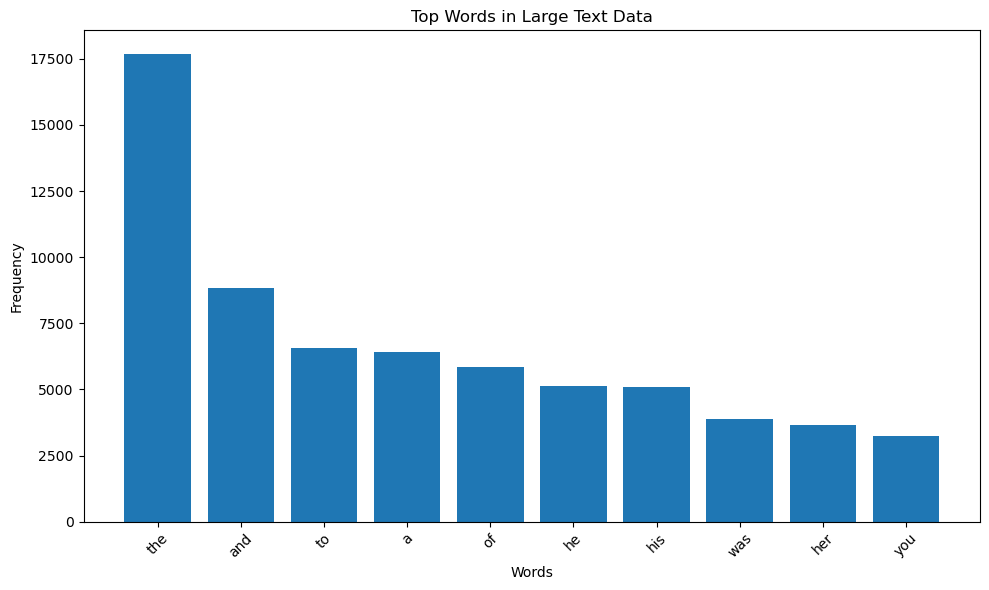

In [15]:
words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Top Words in Large Text Data")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# CBOW 

**Certainly! CBOW, short for Continuous Bag of Words, is a word embedding model used in natural language processing (NLP). It's one of the two primary architectures for training word2vec models, the other being Skip-Gram. CBOW focuses on predicting a target word based on the context words surrounding it.**

In [20]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Create a CBOW Word2Vec model
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, sg=0)

# Access the learned word vectors
vector = model.wv['computer']
print("Vector for 'computer':", vector)

# Find similar words
similar_words = model.wv.most_similar('learning', topn=3)
print("Similar words to 'learning':", similar_words)


Vector for 'computer': [-0.00515774 -0.00667028 -0.0077791   0.00831315 -0.00198292 -0.00685696
 -0.0041556   0.00514562 -0.00286997 -0.00375075  0.0016219  -0.0027771
 -0.00158482  0.0010748  -0.00297881  0.00852176  0.00391207 -0.00996176
  0.00626142 -0.00675622  0.00076966  0.00440552 -0.00510486 -0.00211128
  0.00809783 -0.00424503 -0.00763848  0.00926061 -0.00215612 -0.00472081
  0.00857329  0.00428459  0.0043261   0.00928722 -0.00845554  0.00525685
  0.00203994  0.0041895   0.00169839  0.00446543  0.0044876   0.0061063
 -0.00320303 -0.00457706 -0.00042664  0.00253447 -0.00326412  0.00605948
  0.00415534  0.00776685  0.00257002  0.00811905 -0.00138761  0.00808028
  0.0037181  -0.00804967 -0.00393476 -0.0024726   0.00489447 -0.00087241
 -0.00283173  0.00783599  0.00932561 -0.0016154  -0.00516075 -0.00470313
 -0.00484746 -0.00960562  0.00137242 -0.00422615  0.00252744  0.00561612
 -0.00406709 -0.00959937  0.00154715 -0.00670207  0.0024959  -0.00378173
  0.00708048  0.00064041  0.00

KeyError: "Key 'learning' not present in vocabulary"

# Skip-grap

**Certainly! The Skip-Gram model is a word embedding technique used in natural language processing (NLP) to learn dense vector representations (embeddings) of words. It's one of the architectures used in the Word2Vec framework. Unlike the Continuous Bag of Words (CBOW) model, which predicts a target word given a context of surrounding words, Skip-Gram predicts context words based on a target word.**

In [10]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Create a Skip-Gram Word2Vec model
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, sg=1)

# Access the learned word vectors
vector = model.wv['computer'] 
print("Vector for 'computer':", vector)

# Find similar words
similar_words = model.wv.most_similar('learning', topn=3)
print("Similar words to 'learning':", similar_words)


Vector for 'computer': [-0.00515774 -0.00667028 -0.0077791   0.00831315 -0.00198292 -0.00685696
 -0.0041556   0.00514562 -0.00286997 -0.00375075  0.0016219  -0.0027771
 -0.00158482  0.0010748  -0.00297881  0.00852176  0.00391207 -0.00996176
  0.00626142 -0.00675622  0.00076966  0.00440552 -0.00510486 -0.00211128
  0.00809783 -0.00424503 -0.00763848  0.00926061 -0.00215612 -0.00472081
  0.00857329  0.00428459  0.0043261   0.00928722 -0.00845554  0.00525685
  0.00203994  0.0041895   0.00169839  0.00446543  0.0044876   0.0061063
 -0.00320303 -0.00457706 -0.00042664  0.00253447 -0.00326412  0.00605948
  0.00415534  0.00776685  0.00257002  0.00811905 -0.00138761  0.00808028
  0.0037181  -0.00804967 -0.00393476 -0.0024726   0.00489447 -0.00087241
 -0.00283173  0.00783599  0.00932561 -0.0016154  -0.00516075 -0.00470313
 -0.00484746 -0.00960562  0.00137242 -0.00422615  0.00252744  0.00561612
 -0.00406709 -0.00959937  0.00154715 -0.00670207  0.0024959  -0.00378173
  0.00708048  0.00064041  0.00

KeyError: "Key 'learning' not present in vocabulary"

# Another Example 

In [3]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


In [4]:
# Sample corpus
corpus = [
    "ChatGPT is a powerful language model.",
    "It generates human-like text.",
    "Word2Vec is a technique for word embeddings."
]


In [5]:
# Tokenize the corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train the Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1)

In [6]:
# Find the vector representation of a word
word_vector = model.wv['chatgpt']

# Find similar words
similar_words = model.wv.most_similar('powerful', topn=3)

In [7]:
# Print results
print("Vector representation of 'chatgpt':", word_vector)
print("Similar words to 'powerful':", similar_words)

Vector representation of 'chatgpt': [-7.1909428e-03  4.2328904e-03  2.1633946e-03  7.4407146e-03
 -4.8892652e-03 -4.5643463e-03 -6.0981740e-03  3.2993674e-03
 -4.4994629e-03  8.5228849e-03 -4.2888271e-03 -9.1054197e-03
 -4.8163556e-03  6.4164903e-03 -6.3713240e-03 -5.2615367e-03
 -7.3044109e-03  6.0222615e-03  3.3575939e-03  2.8483903e-03
 -3.1385506e-03  6.0308911e-03 -6.1527453e-03 -1.9801008e-03
 -5.9830821e-03 -9.9568011e-04 -2.0209861e-03  8.4859459e-03
  7.8001023e-05 -8.5753258e-03 -5.4290984e-03 -6.8759858e-03
  2.6923812e-03  9.4566476e-03 -5.8159959e-03  8.2650259e-03
  8.5320519e-03 -7.0626391e-03 -8.8832127e-03  9.4691841e-03
  8.3743641e-03 -4.6908916e-03 -6.7260410e-03  7.8421365e-03
  3.7633455e-03  8.0955038e-03 -7.5715459e-03 -9.5250849e-03
  1.5774060e-03 -9.8057678e-03 -4.8858845e-03 -3.4601032e-03
  9.6209226e-03  8.6235693e-03 -2.8356076e-03  5.8268728e-03
  8.2370946e-03 -2.2629809e-03  9.5285419e-03  7.1602152e-03
  2.0415008e-03 -3.8487636e-03 -5.0817500e-03 -3.

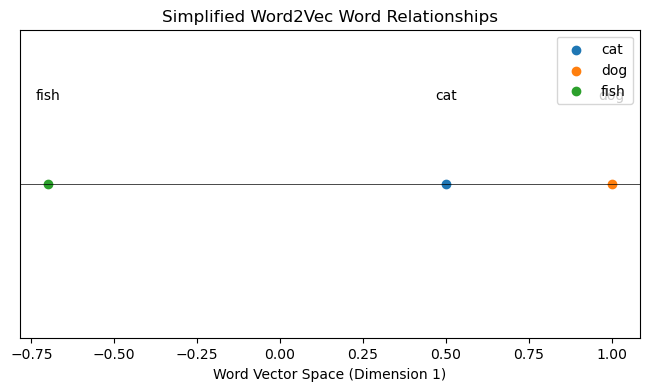

In [23]:
import matplotlib.pyplot as plt

# Word vectors (simplified)
word_vectors = {
    "cat": 0.5,
    "dog": 1.0,
    "fish": -0.7
}

# Plotting the word vectors
plt.figure(figsize=(8, 4))

for word, vector in word_vectors.items():
    plt.scatter(vector, 0, marker='o', label=word)
    plt.text(vector, 0.03, word, ha='center', fontsize=10)

plt.axhline(y=0, color='k', linewidth=0.5)
plt.xlabel("Word Vector Space (Dimension 1)")
plt.yticks([])
plt.title("Simplified Word2Vec Word Relationships")
plt.legend()
plt.show()
